## - 불러올 패키지 목록

In [1]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 사이킷런 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공

# 사이파이 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 시각화를 위한 패키지
import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions

%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

# Dataset 불러오기 및 data 정보 확인

## 데이터 불러오기

In [2]:
# 분석할 데이터 불러오기 / 데이터프레임 생성
df_credit = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\ADP_study\rawdata\credit_final.csv')

df_credit

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


## data 정보 확인

In [3]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   credit.rating                   1000 non-null   int64
 1   account.balance                 1000 non-null   int64
 2   credit.duration.months          1000 non-null   int64
 3   previous.credit.payment.status  1000 non-null   int64
 4   credit.purpose                  1000 non-null   int64
 5   credit.amount                   1000 non-null   int64
 6   savings                         1000 non-null   int64
 7   employment.duration             1000 non-null   int64
 8   installment.rate                1000 non-null   int64
 9   marital.status                  1000 non-null   int64
 10  guarantor                       1000 non-null   int64
 11  residence.duration              1000 non-null   int64
 12  current.assets                  1000 non-null   int64
 13  age 

# 모델 학습에 사용할 x값(예측변수) 설정

In [4]:
x = df_credit.iloc[:,1:21]
y = df_credit.iloc[:,0]

# 학습/테스트용 데이터셋 분리

In [5]:
# 데이터셋 나누고 라벨 분포 확인
x_train, x_test, y_train, y_test  = train_test_split( x, y,
                                                      test_size = 0.30,
                                                      random_state = 153 )

# 라벨별 데이터 분포 확인
print( Counter(y_train) )
print()
print( Counter(y_test) )

Counter({1: 495, 0: 205})

Counter({1: 205, 0: 95})


# 모델 생성 및 학습

## LinearSVC 모델 생성

In [6]:
model_svm = SVC( kernel = 'linear' )

## train 데이터로 학습 수행

In [7]:
# 모델 학습
model_svm.fit( x_train, y_train )

SVC(kernel='linear')

In [8]:
# 모델의 정답에 대한 정보 확인
model_svm.classes_

array([0, 1], dtype=int64)

# 예측 및 평가

## 학습된 모델로 예측 수행

In [9]:
# test 데이터로 라벨 예측
y_pred = model_svm.predict( x_test )

pd.DataFrame( {'y_True' : y_test,
               'y_Predict' : y_pred,
               'Pred_Result' : y_test == y_pred} ).head(10)

,y_True,y_Predict,Pred_Result
92,1,0,False
372,1,1,True
526,1,0,False
276,1,1,True
260,1,1,True
839,0,1,False
930,0,1,False
121,1,1,True
68,1,1,True
970,0,0,True


## 평가

### Confusion Metrix

In [10]:
conf_mat = pd.crosstab( y_test, y_pred, rownames=['pred'], colnames=['real'] )
conf_mat

real,0,1
pred,,
0,44,51
1,26,179


In [11]:
confusion_matrix(y_test, y_pred)

array([[ 44,  51],
       [ 26, 179]], dtype=int64)

### 분석 지표

In [12]:
# Accuracy
model_svm.score( x_test, y_test )

0.7433333333333333

In [13]:
print( 'Accuracy: ', accuracy_score(y_test, y_pred) )
print()

print( classification_report(y_test, y_pred, digits = 3) )
print()

Accuracy:  0.7433333333333333

              precision    recall  f1-score   support

           0      0.629     0.463     0.533        95
           1      0.778     0.873     0.823       205

    accuracy                          0.743       300
   macro avg      0.703     0.668     0.678       300
weighted avg      0.731     0.743     0.731       300




### ROC curve / AUC

Accuracy:  0.7433333333333333
AUC:  0.6681643132220796



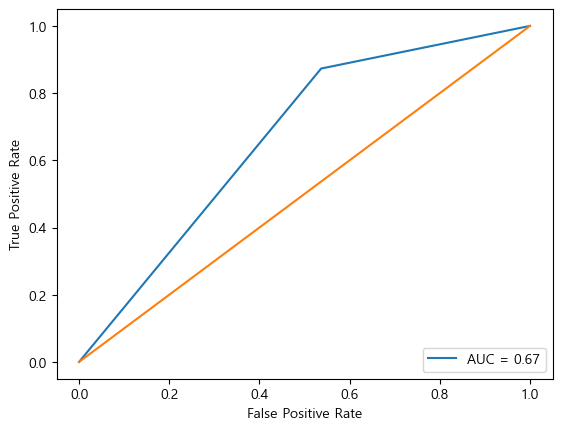

In [14]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ', acc )

# AUC 계산
auc = roc_auc_score( y_test, y_pred )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test, y_pred,
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.2f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )

plt.show()

# 모델 최적화

## Hyper parameter 최적화: `GridSearchCV`

### 파라미터 확인 및 평가 조건 설정

In [15]:
# 파라미터 목록 확인
list( model_svm.get_params().keys() )

['C',
 'break_ties',
 'cache_size',
 'class_weight',
 'coef0',
 'decision_function_shape',
 'degree',
 'gamma',
 'kernel',
 'max_iter',
 'probability',
 'random_state',
 'shrinking',
 'tol',
 'verbose']

In [ ]:
# 평가할 파라미터 split 조건 설정

params = { 'gamma' : [10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1 ] }

grid = GridSearchCV( model_svm,
                     param_grid = params,
                     cv = 7,
                     scoring = 'accuracy',
                     n_jobs=-1)

# split 조건별로 하이퍼 파라미터 학습/평가
grid.fit( x, y )

In [ ]:
df_grid = pd.DataFrame( grid.cv_results_ )

df_grid.info()

In [ ]:
pd.set_option('display.max_colwidth', None)  # 데이터프레임의 셀 폭 설정 (한 셀의 너비에 내용이 다 안들어갈 경우)
pd.set_option('display.max_row', 80)  # 데이터프레임의 출력 행 개수 설정 (한 셀에 모든 행 표시가 안될 경우)

df_grid[ ['params','mean_test_score','rank_test_score'] ].sort_values(['rank_test_score']).head(30)

### 최적의 파라미터 추출

In [ ]:
print("최고 Score: ", str(np.round(grid.best_score_, 4)))
print("최적 Parameters: ",str(grid.best_params_))
print("최적 Estimators: ",str(grid.best_estimator_))